In [1]:
import googlemaps
from API import K
import requests
import json
import pickle
import networkx as nx
import pandas as pd

# G = pickle.load(open('data/network_cleaned_final.p', 'rb'))
G = pickle.load(open('data/revised_cleaning_results/cleaned_network.p', 'rb'))
df_h = pickle.load(open("data/revised_cleaning_results/harbour_data_100.p", "rb"))
# G = pickle.load(open('data/network_digital_twin_v0.3.pickle', 'rb'))

for node1, node2 in G.edges:
    if node1 == node2:
        print("Self loop identified node", node1)
        G.remove_edge(node1,node2)
#
pos_dict = {}
for node in G.nodes:
    pos_dict[node] = (G.nodes[node]['X'], G.nodes[node]['Y'])
#
# bounding box nl
bb = (3.31497114423, 50.803721015, 7.09205325687, 53.5104033474)
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')
df_nodes = df_nodes.loc[(df_nodes.X.between(bb[0], bb[2])) & (df_nodes.Y.between(bb[1], bb[3]))]
nodes_to_keep = list(df_links.loc[df_links.Code != '_0'].source) + list(df_links.loc[df_links.Code != '_0'].target)
#visualise new subset

#subset graph and make editable again
G = G.subgraph(nodes_to_keep)
G = nx.Graph(G)
df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

In [2]:
import osmnx as ox
# geometries_from_bbox(53.5104033474,50.803721015,7.09205325687,3.31497114423
fuelstations = ox.geometries_from_bbox(53.5104033474,50.803721015,7.09205325687,3.31497114423,tags={'waterway':'fuel'})

In [3]:
fuelstations = fuelstations.loc[fuelstations['seamark:type']!='small_craft_facility']
fuelstations = fuelstations.loc[fuelstations['seamark:small_craft_facility:category']!='fuel_station']

In [4]:
r = requests.get(f"https://maps.googleapis.com/maps/api/place/textsearch/json?query={'bunkerstation binnenvaart Nederland'}&region=nl&inputtype=textquery&key={K}")
results = json.loads(r.content)
r = requests.get(f"https://maps.googleapis.com/maps/api/place/textsearch/json?query={'oliehandel binnenvaart Nederland'}&region=nl&inputtype=textquery&key={K}")
results2 = json.loads(r.content)
r = requests.get(f"https://maps.googleapis.com/maps/api/place/textsearch/json?query={'bunkeren scheepvaart Nederland'}&region=nl&inputtype=textquery&key={K}")
results3 = json.loads(r.content)
r = requests.get(f"https://maps.googleapis.com/maps/api/place/textsearch/json?query={'bunker station shipping Netherlands'}&region=nl&inputtype=textquery&key={K}")
results4 = json.loads(r.content)

In [5]:
lons=[]  # y
lats=[]  # x

for entry in results['results']:
    lats.append(entry['geometry']['location']['lat'])
    lons.append(entry['geometry']['location']['lng'])

for entry in results2['results']:
    lats.append(entry['geometry']['location']['lat'])
    lons.append(entry['geometry']['location']['lng'])

for entry in results3['results']:
    lats.append(entry['geometry']['location']['lat'])
    lons.append(entry['geometry']['location']['lng'])

for entry in results4['results']:
    lats.append(entry['geometry']['location']['lat'])
    lons.append(entry['geometry']['location']['lng'])

In [6]:
df_links.reset_index(drop=True, inplace=True)

In [7]:
from itertools import count
import numpy as np
types = ['I', 'II', 'III', 'IV', 'V_A', 'V_B', 'VI_A', 'VI_B', 'VI_C']
mapping = dict(zip(types,count()))
color_palette = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
print(mapping)
colors = [color_palette[mapping[df_links.iloc[n]['Code']]] for n in df_links.index if df_links.iloc[n]['Code'] in mapping]

{'I': 0, 'II': 1, 'III': 2, 'IV': 3, 'V_A': 4, 'V_B': 5, 'VI_A': 6, 'VI_B': 7, 'VI_C': 8}


In [9]:
fuelstations

seamark:small_craft_facility:category    seamark:type  \
element_type osmid                                                              
way          624030102                                    NaN  bunker_station   
node         1126385854                                   NaN             NaN   
             1571092739                                   NaN             NaN   
             3857063321                                   NaN             NaN   
             4148725900                                   NaN             NaN   
             4790673830                                   NaN             NaN   
             9920958413                                   NaN             NaN   
             2867514257                                   NaN             NaN   
             8804815890                                   NaN             NaN   
way          503081969                                    NaN  bunker_station   
node         7797394748                                   NaN             NaN   
             6428768406                                   NaN             NaN   
             8541839507                                   NaN             NaN   
             9804710691                                   NaN             NaN   
way          642208234                                    NaN             NaN   
node         1368199605                                   NaN             NaN   
             1368199756                                   NaN             NaN   
             4690202048                                   NaN             NaN   
way          281402014                                    NaN             NaN   
node         1395865392                                   NaN             NaN   
             4537329787                                   NaN             NaN   
             5780321805                                   NaN             NaN   
             506434592                                    NaN             NaN   
             599578269                                    NaN             NaN   
             1834356263                                   NaN             NaN   
             2244531690                                   NaN             NaN   
             2332718417                                   NaN             NaN   
             4934218118                                   NaN  bunker_station   
             4958547636                                   NaN             NaN   
             4998399605                                   NaN             NaN   
             5794295850                                   NaN             NaN   
             5794295973                                   NaN             NaN   
             5817797475                                   NaN             NaN   
             5818308020                                   NaN             NaN   
             5824820254                                   NaN             NaN   
             1366779107                                   NaN             NaN   
             6681289516                                   NaN             NaN   
             7318990824                                   NaN             NaN   
             7319133436                                   NaN             NaN   
             1395865545                                   NaN             NaN   
             1415313129                                   NaN             NaN   
             1415313157                                   NaN             NaN   
             2883687601                                   NaN             NaN   
             5803701067                                   NaN             NaN   
             5803907891                                   NaN             NaN   
             5804509352                                   NaN             NaN   
             5805994405                                   NaN             NaN   
             5810252166                                

In [10]:
lats1 = list(fuelstations.geometry.centroid.y.values)
lons1 = list(fuelstations.geometry.centroid.x.values)

C:\Users\Fabia\AppData\Local\Temp\ipykernel_8900\2327446262.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lats1 = list(fuelstations.geometry.centroid.y.values)
C:\Users\Fabia\AppData\Local\Temp\ipykernel_8900\2327446262.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lons1 = list(fuelstations.geometry.centroid.x.values)


C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


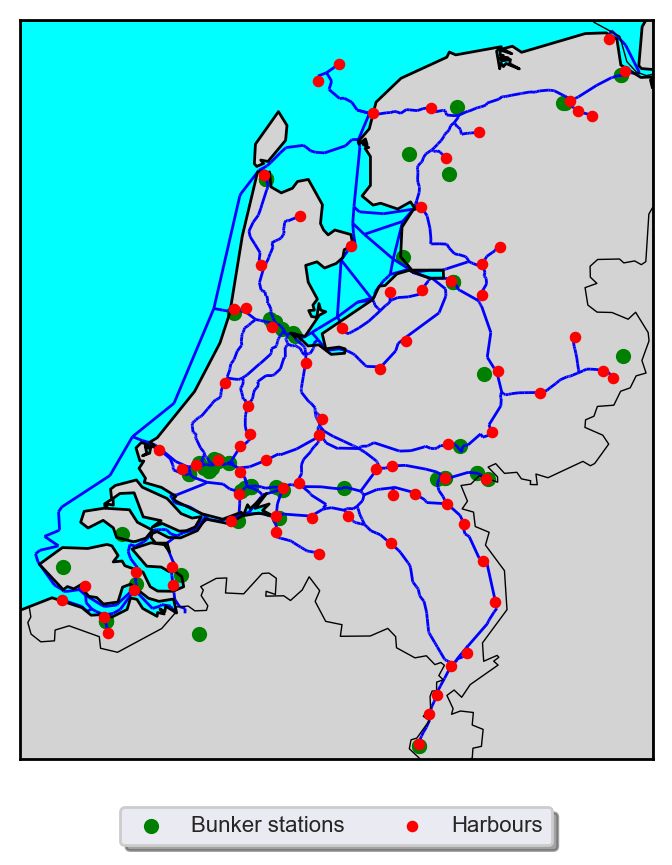

In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=200)

df_links = nx.to_pandas_edgelist(G)
df_nodes = pd.DataFrame.from_dict(dict(G.nodes(data=True)), orient='index')

m = Basemap(projection='merc',
              llcrnrlon=3.31497114423,
              llcrnrlat=50.803721015,
              urcrnrlon=7.09205325687,
              urcrnrlat=53.5104033474,
              lat_0=(3.31497114423+7.09205325687)/2,
              lon_0=(50.8+53.5104033474)/2,
              resolution='i'
              )

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#D3D3D3',lake_color='aqua')
m.drawcoastlines()
m.drawcountries()
pos={}
mx, my = m(df_nodes.X.values, df_nodes.Y.values)
for count, elem in enumerate (df_nodes.n):
     pos[elem] = (mx[count], my[count])




# nx.draw_networkx_edges(G, pos, edge_color=colors, width=1, label='Code')

# map.drawrivers(color='b')
# lons = [0, 10, -20, -20]
# lats = [0, -10, 40, -20]

# x, y = m(list(lons1), list(lats1))
# m.scatter(x, y ,color='m', label='Fuel stations (OSM)', s=20)

x, y = m(list(lons), list(lats))
m.scatter(x, y ,color='g', label='Bunker stations', s=20)

nx.draw_networkx_nodes(G, pos, node_size=10, node_color='r', nodelist=list(df_h.harbour_node.unique()),label='Harbours')
nx.draw_networkx_edges(G, pos, edge_color='b', width=1)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2, fontsize=8)
plt.show()

In [12]:
Basemap?

C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\mpl_toolkits\basemap\__init__.py:2226: DeprecationWarning: invalid escape sequence '\*'
  """
C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\mpl_toolkits\basemap\__init__.py:2504: DeprecationWarning: invalid escape sequence '\*'
  """
C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\mpl_toolkits\basemap\__init__.py:2812: DeprecationWarning: invalid escape sequence '\*'
  """
C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\mpl_toolkits\basemap\__init__.py:2869: DeprecationWarning: invalid escape sequence '\*'
  """
C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\mpl_toolkits\basemap\__init__.py:3244: DeprecationWarning: invalid escape sequence '\*'
  """
C:\Users\Fabia\miniconda3\envs\ox\lib\site-packages\mpl_t

OSError: cannot locate ../sample_files/comarques.shp

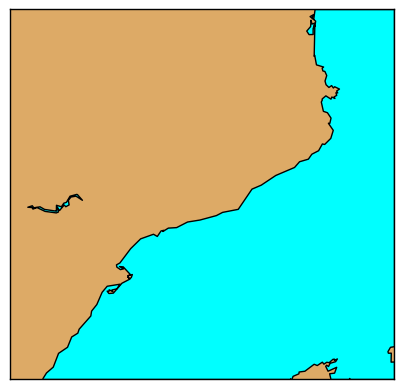

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
             resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)

m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()

m.readshapefile('../sample_files/comarques', 'comarques')

plt.show()

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap


In [ ]:
graph = nx.from_pandas_dataframe(routes_us, source = 'Source Airport', target = 'Dest Airport',
                        edge_attr = 'number of flights',create_using = nx.DiGraph())